In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(456)

In [2]:
X=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float64)
Y=np.array([[0,1],[1,0],[1,0],[0,1]],dtype=np.float64)

def sigmoid(x):
   y=np.exp(-1*x)+1
   y=1/y
   #print(y)
   return y
def sigmoid_deriv(x):
    return x*(1-x)


class Layer():
    
    def __init__(self,name='no_name',pnd=1,nd=0):
        self.Layer=name
        self.value=np.zeros((nd),dtype=np.float64)
        self.weights=np.random.random(size=(nd,pnd))*2.0-1.0
        self.delta=np.zeros((nd,pnd),dtype=np.float64)
        self.deriv=np.zeros((nd,pnd),dtype=np.float64)
        self.error=np.zeros((nd),dtype=np.float64)
    def printl(self):
        print(self.Layer,end=' ')
        print('Node',self.weights.shape[1])
        
net=[]
_layer=Layer('Input',0,2)
_layer.printl()
net.append(_layer)
_layer=Layer('Hidden_one',2,3)
_layer.printl()
net.append(_layer)
_layer=Layer('Output',3,2)
_layer.printl()
net.append(_layer)


Input Node 0
Hidden_one Node 2
Output Node 3


In [3]:
error_log=np.zeros((100),np.float64)
epoc_val=np.zeros((100),np.float64)
    
def for_prop(net,_input):
    for j in range(len(net)):
        Layer=net[j]
         
        #print('FP',Layer.Layer)
        if Layer.Layer=='Input':
            Layer.value=_input
        else:
            Prev_Layer=net[j-1]
            val=np.matmul(Layer.weights,Prev_Layer.value)
            Layer.value=sigmoid(val)
            Layer.deriv=sigmoid_deriv(Layer.value)
            
    return net,Layer.value
def back_prop(net,expected):
    for j in reversed(range(len(net))):
        Layer=net[j]
        #print('BP',Layer.Layer)
        if Layer.Layer=='Input':
            break
        else:
            Prev_Layer=net[j-1]
        if Layer.Layer=='Output':
            Layer.error=expected-Layer.value
        
        else :
            Next_Layer=net[j+1]
            weights=Next_Layer.weights.T
            Layer.error=np.matmul(weights,Next_Layer.error)
           
        Layer.deriv=Layer.deriv*Layer.error
        #import pdb;pdb.set_trace()
        for i in range(Layer.delta.shape[0]):
              Layer.delta[i,:]=Prev_Layer.value*Layer.deriv[i]
        
    return net,err

def weight_update(net,alpha=0.1):
    for j in range(len(net)):
        Layer=net[j]
        Layer.weights+=alpha*Layer.delta
            
    return net
      



In [4]:
#net=network()
_epock=np.zeros((15000),np.int64)
_error=np.zeros((15000,2),np.float64)

for epock in range(1,15000):
    err=0
    for i in range(len(X)):
        #print('X',X[i],'Y',Y[i])
        net,v=for_prop(net,X[i])
        net,e=back_prop(net,Y[i])
        net=weight_update(net)
        #net=updateWeights(net,X[i],.05)
        err=(Y[i]-v)**2 #for j in range(len(Y[i]))
        #print(epock)
        #print(e)
        _epock[epock-1]=epock
        _error[epock-1]=e
_epock[epock]=epock
_error[epock]=e
print(sigmoid_deriv(.93))

0.06509999999999996


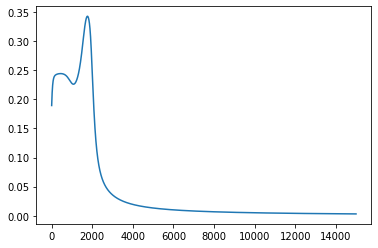

[[0.09471417 0.94432969 0.94431222 0.01167631]
 [0.90508728 0.05578885 0.05580646 0.98827101]]


In [6]:
plt.plot(_epock,_error[0:15000,0])
plt.show()
_,v=for_prop(net,X.T)
print(v)

### Extra Debug Codes :

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


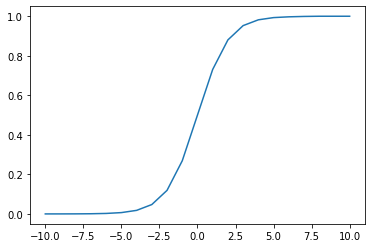

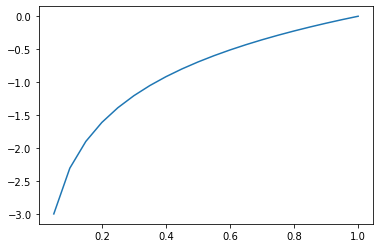

In [8]:
x=np.ones((21),np.int8)
for i in range(0,21):
    x[i]=i-10
y=np.exp(-1*x)
y=1+y
y=1/y
p=(x+10)/20
z=np.log(p)
print(x)
plt.plot(x,y)
plt.show()
plt.plot(p,z)
plt.show()

In [9]:
print(np.argmax([.2,.3]))

1
